In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('./ushape.csv',
    header=None,
    names=['X', 'Y', 'class'])

# now round X and Y
df[['X','Y']] = df[['X','Y']].round(4)

df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1151,-0.0462,1.0
2,0.8825,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8295,-0.5393,1.0


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
X = df.iloc[:, :2].values
y = df.iloc[:, -1].values

In [8]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_shape=(2,)))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

c:\Users\ishaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[-0.16493934, -0.59280854, -0.23633593, -0.6516557 , -0.61430347,
          0.03941709,  0.69734925, -0.04163164, -0.5617222 , -0.13418055],
        [-0.23294649, -0.07337749,  0.12598383,  0.04484576, -0.25160202,
         -0.21523502,  0.49727196, -0.06623596, -0.5574622 , -0.46948183]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.17956346, -0.20091292, -0.29121345,  0.12294501],
        [-0.01319313, -0.09412003, -0.27232897,  0.00091976],
        [ 0.54894364, -0.01503831,  0.4104718 , -0.47178084],
        [-0.5443723 ,  0.49746096, -0.6341703 , -0.28866854],
        [-0.03726107,  0.17959017, -0.49660826, -0.5997126 ],
        [ 0.4049884 , -0.5283563 , -0.40797466, -0.14007187],
        [-0.3491742 , -0.46911198,  0.32717198,  0.09496158],
        [-0.2535371 , -0.17439526,  0.3268121 , -0.55122805],
        [-0.40079927, -0.36003858,  0.40665996, -0.5857352 ],
        [-0.28527814, -0.38066897, -0.19609702,  0.1773

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.73496664],
        [-0.22063887],
        [ 0.6799445 ],
        [ 0.5683075 ]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X, y, epochs=100, validation_split=0.2, verbose=0)

In [17]:
model.get_weights()

[array([[-0.40270984, -0.40270984, -0.40270984, -0.40270984, -0.40270984,
         -0.40270984, -0.40270984, -0.40270984, -0.40270984, -0.40270984],
        [ 0.42300624,  0.42300624,  0.42300624,  0.42300624,  0.42300624,
          0.42300624,  0.42300624,  0.42300624,  0.4230062 ,  0.4230062 ]],
       dtype=float32),
 array([-0.01688559, -0.01688559, -0.01688559, -0.01688559, -0.01688559,
        -0.01688559, -0.01688559, -0.01688559, -0.0168856 , -0.0168856 ],
       dtype=float32),
 array([[ 0.10276271,  0.10240526, -0.10389186, -0.10408351],
        [ 0.10276271,  0.10240526, -0.10389186, -0.10408351],
        [ 0.10276271,  0.10240526, -0.10389186, -0.10408351],
        [ 0.10276271,  0.10240526, -0.10389186, -0.10408351],
        [ 0.10276271,  0.10240526, -0.10389186, -0.10408351],
        [ 0.10276271,  0.10240526, -0.10389186, -0.10408351],
        [ 0.10276271,  0.10240526, -0.10389186, -0.10408351],
        [ 0.10276271,  0.10240526, -0.10389186, -0.10408351],
        [ 0.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 550us/step


<Axes: >

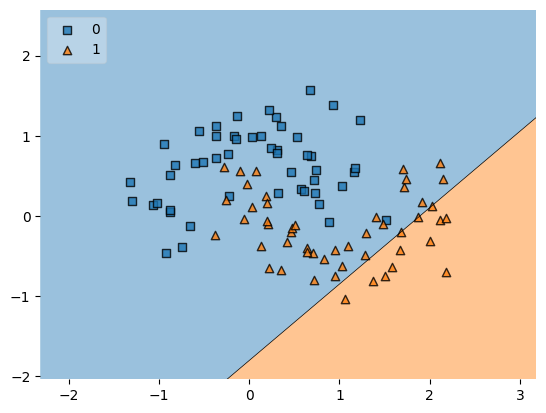

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)